# Geo data

<div class="admonition note">
    <p class="admonition-title">In progress</p>
    <p>This document is a work in progress if you see any errors, or exclusions or have any problems, please <a href="https://github.com/absespy/ABSESpy/issues">get in touch with us</a>.</p>
</div>

This notebook shows how to work with geographic spatial datasets.

<!-- Download the data from [here](https://www.kaggle.com/c/tweet-sentiment-extraction/data) and place it in the `data` directory. -->

## Setup Geo spatial area

In `yaml` settings file, when assigning the `world` parameter of a `nature` module as a path of map, module will automatically read this map as the "basemap".

```yaml
world: data/mean_prec.tif
```


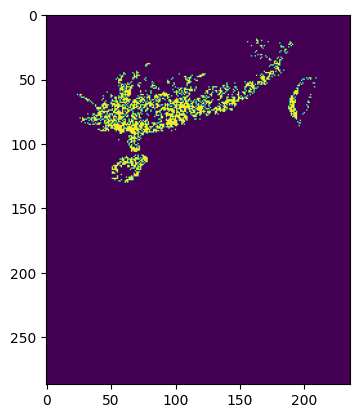

In [1]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
import rasterio

# data path
data_folder = Path("data/")
data_folder.exists()
data = data_folder / "farmland.tif"

# read dataset
with rasterio.open(data) as src:
    img = src.read(1)
# plt.imshow(img, origin="upper")
plt.imshow(img)

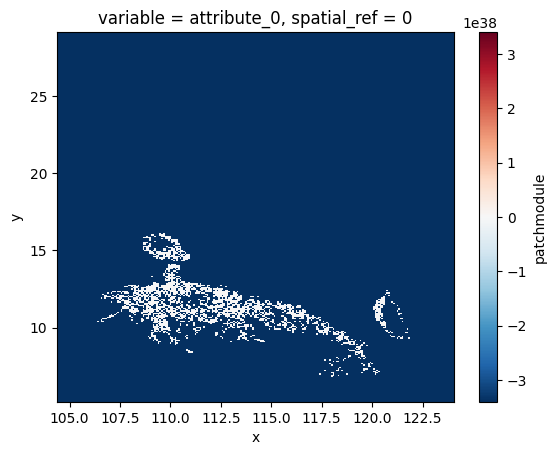

In [2]:
from abses import MainModel

# default model
model = MainModel()

sub_module = model.nature.create_module(
    how="from_file", raster_file=data, apply_raster=True
)

# plotting
sub_module.get_xarray().plot()

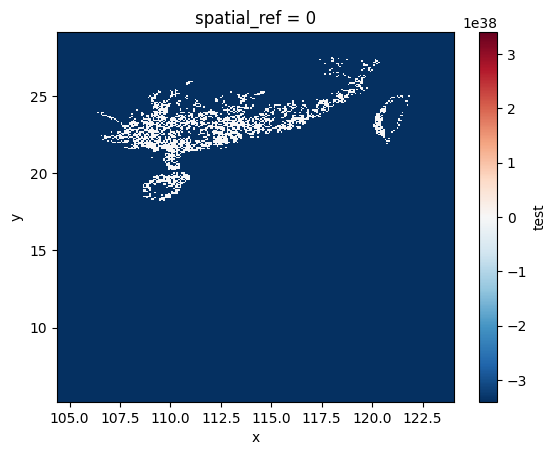

In [3]:
import numpy as np

sub_module.apply_raster(data=img, attr_name="test", flipud=True)
sub_module.get_xarray("test").plot()

In [4]:
np.unique(img)

array([-3.402823e+38,  1.033000e+00,  1.233000e+00,  1.366000e+00,
        1.433000e+00,  1.566000e+00,  1.633000e+00,  1.699000e+00,
        1.766000e+00,  1.833000e+00,  1.899000e+00,  1.933000e+00,
        1.966000e+00,  2.066000e+00,  2.099000e+00,  2.133000e+00,
        2.166000e+00,  2.266000e+00,  2.299000e+00,  2.333000e+00,
        2.399000e+00,  2.466000e+00,  2.499000e+00,  2.599000e+00,
        2.666000e+00,  2.799000e+00,  2.999000e+00], dtype=float32)